<img src="https://c8.alamy.com/comp/WWB4A5/mobile-vector-icon-smart-phone-tablet-mobile-version-WWB4A5.jpg" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Mobile tablet price - Predict "price" of used mobile/tablet</font></h1>
<h2 align="center"><font size="5">Deadline: 2023-04-16 00:00:00 (Thursday)</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Chú ý: Học viên tạo folder trên Google Drive theo cú pháp: MDS5_HoVaTen_Thi, upload toàn bộ bài thi lên >> Share folder này cho thầy theo email: datafarmer2019@gmail.com để thầy chấm điểm. Yêu cầu: Nộp bài đúng deadline. Bài làm giống nhau bị trừ điểm.

### Your information:
- Fullname:
- Date of birth:
- Place of birth:
- Email:
- Mobile phone:

In this notebook, we practice all the knowledge and skills that we have learned in this course (MDS5: Data pre-processing and Analysis)

We apply the **Linear Regression Algorithm** to predict: **"price of used mobile/tablet"** by accuracy evaluation methods.

<!-- Please read [Gemstone price prediction information](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction) carefully before you do this project! -->

Dataset: used_device_data.csv

#### Data dictionary:
1. device_brand: Name of manufacturing brand
2. os: OS on which the device runs
3. screen_size: Size of the screen in cm
4. internet: Whether 4G is available or 5G or Both
5. front_camera_mp: Resolution of the rear camera in megapixels
6. back_camera_mp: Resolution of the front camera in megapixels
7. internal_memory: Amount of internal memory (ROM) in GB
8. ram: Amount of RAM in GB
9. battery: Energy capacity of the device battery in mAh
10. weight: Weight of the device in grams
11. release_year: Year when the device model was released
12. days_used: Number of days the used/refurbished device has been used
13. normalized_new_price: Normalized price of a new device of the same model
14. normalized_used_price (TARGET): Normalized price of the used/refurbished device

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

## Import library package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analysis.analyzer import TTTH_Analyzer
from processor.feature import FeatureProcessor

In [2]:
_analyzer = TTTH_Analyzer()
_processor = FeatureProcessor()

## Read dataset, clean headers and check overview

device_brand       os  screen_size  rear_camera_mp  front_camera_mp  \
0        Honor  Android        14.50            13.0              5.0   
1        Honor  Android        17.30            13.0             16.0   
2        Honor  Android        16.69            13.0              8.0   
3        Honor  Android        25.50            13.0              8.0   
4        Honor  Android        15.32            13.0              8.0   

   internal_memory  ram  battery  weight  release_year  days_used  \
0             64.0  3.0   3020.0   146.0          2020        127   
1            128.0  8.0   4300.0   213.0          2020        325   
2            128.0  8.0   4200.0   213.0          2020        162   
3             64.0  6.0   7250.0   480.0          2020        345   
4             64.0  3.0   5000.0   185.0          2020        293   

   normalized_used_price  normalized_new_price internet  
0               4.307572              4.715100       4g  
1               5.162097              5.519018     both  
2               5.111084              5.884631     both  
3               5.135387              5.630961     both  
4               4.389995              4.947837       4g

device_brand       os  screen_size  rear_camera_mp  front_camera_mp  \
3449         Asus  Android        15.34             NaN              8.0   
3450         Asus  Android        15.24            13.0              8.0   
3451      Alcatel  Android        15.80            13.0              5.0   
3452      Alcatel  Android        15.80            13.0              5.0   
3453      Alcatel  Android        12.83            13.0              5.0   

      internal_memory  ram  battery  weight  release_year  days_used  \
3449             64.0  6.0   5000.0   190.0          2019        232   
3450            128.0  8.0   4000.0   200.0          2018        541   
3451             32.0  3.0   4000.0   165.0          2020        201   
3452             32.0  2.0   4000.0   160.0          2020        149   
3453             16.0  2.0   4000.0   168.0          2020        176   

      normalized_used_price  normalized_new_price internet  
3449               4.492337              6.483872       4g  
3450               5.037732              6.251538       4g  
3451               4.357350              4.528829       4g  
3452               4.349762              4.624188       4g  
3453               4.132122              4.279994       4g

screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
count  3454.000000     3275.000000      3452.000000      3450.000000   
mean     13.713115        9.460208         6.554229        54.573099   
std       3.805280        4.815461         6.970372        84.972371   
min       5.080000        0.080000         0.000000         0.010000   
25%      12.700000        5.000000         2.000000        16.000000   
50%      12.830000        8.000000         5.000000        32.000000   
75%      15.340000       13.000000         8.000000        64.000000   
max      30.710000       48.000000        32.000000      1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   rear_camera_mp         3275 non-null   float64
 4   front_camera_mp        3452 non-null   float64
 5   internal_memory        3450 non-null   float64
 6   ram                    3450 non-null   float64
 7   battery                3448 non-null   float64
 8   weight                 3447 non-null   float64
 9   release_year           3454 non-null   int64  
 10  days_used              3454 non-null   int64  
 11  normalized_used_price  3454 non-null   float64
 12  normalized_new_price   3454 non-null   float64
 13  internet               3454 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 377.9+ 

* Seem some variable got missing values, need to handle in next step
* `release_year` must be category

## Identify variable

As requirement, predict `normalized_used_price` of devices so
* Output variable: normalized_used_price
* Input variable: 
    * device_brand
    * os
    * screen_size
    * internet
    * front_camera_mp
    * back_camera_mp
    * internal_memory
    * ram
    * battery
    * weight
    * release_year
    * days_used
    * normalized_new_price

### Check de-duplicates

0

No duplicated data

### Handle missing values

rear_camera_mp before fill missing values: 179
rear_camera_mp after fill missing values: 0


front_camera_mp before fill missing values: 2
front_camera_mp after fill missing values: 0


internal_memory before fill missing values: 4
internal_memory after fill missing values: 0


ram before fill missing values: 4
ram after fill missing values: 0


battery before fill missing values: 6
battery after fill missing values: 0


weight before fill missing values: 7
weight after fill missing values: 0


### Split into numeric and category dataframe to analyze

* We need to convert `release_year` into category dtypes

device_brand       os release_year internet
0        Honor  Android         2020       4g
1        Honor  Android         2020     both
2        Honor  Android         2020     both
3        Honor  Android         2020     both
4        Honor  Android         2020       4g

screen_size  rear_camera_mp  front_camera_mp  internal_memory  ram  \
0        14.50            13.0              5.0             64.0  3.0   
1        17.30            13.0             16.0            128.0  8.0   
2        16.69            13.0              8.0            128.0  8.0   
3        25.50            13.0              8.0             64.0  6.0   
4        15.32            13.0              8.0             64.0  3.0   

   battery  weight  days_used  normalized_new_price  
0   3020.0   146.0        127              4.715100  
1   4300.0   213.0        325              5.519018  
2   4200.0   213.0        162              5.884631  
3   7250.0   480.0        345              5.630961  
4   5000.0   185.0        293              4.947837

## Univariate analysis

### Input Category analysis

Index(['device_brand', 'os', 'release_year', 'internet'], dtype='object')

Class count of device_brand:

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: device_brand, dtype: int64


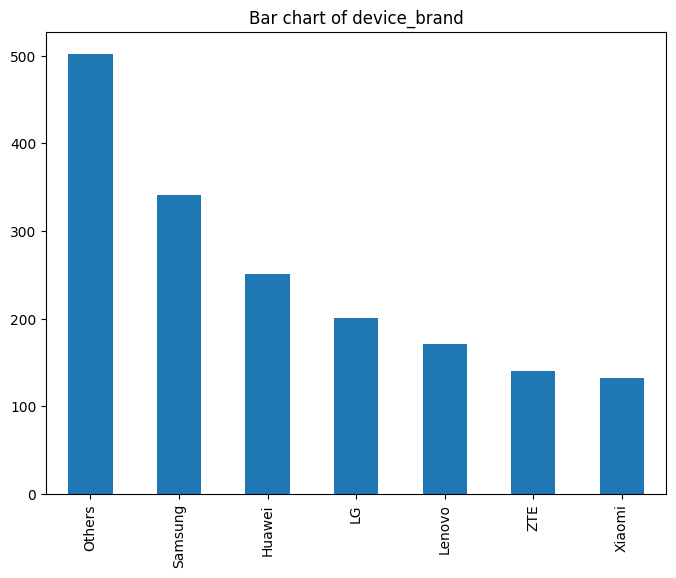

* Seem there are some uncommon category, should be handle

Class count of os:

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64


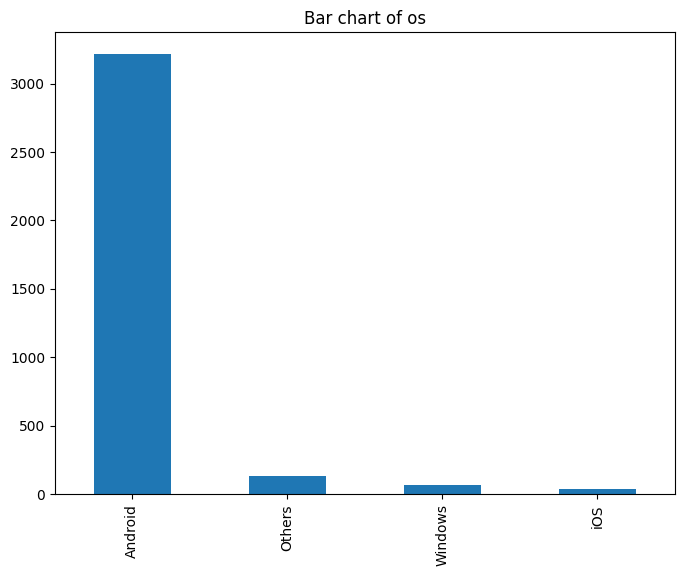

Class count of internet:

4g      2183
no      1119
both     152
Name: internet, dtype: int64


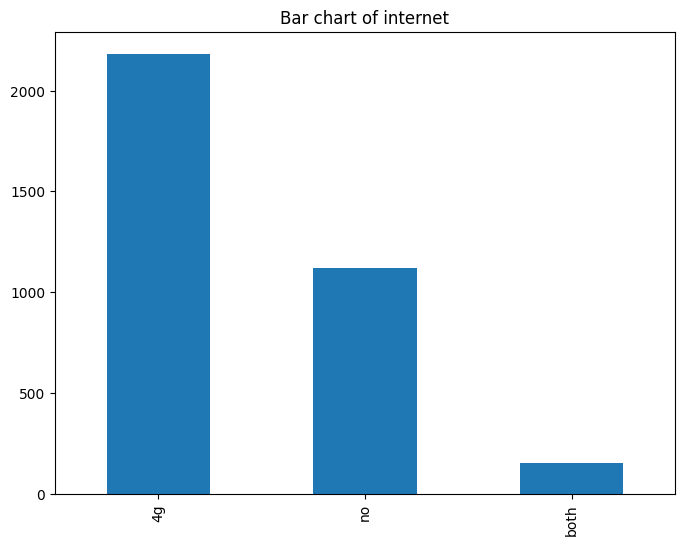

Class count of release_year:

2014    642
2013    570
2015    515
2019    446
2016    383
2018    322
2017    299
2020    277
Name: release_year, dtype: int64


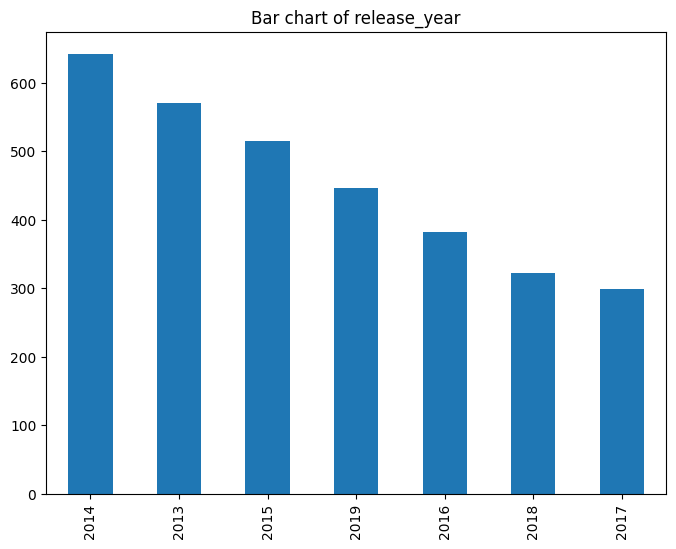

### Input Numerical analysis

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'days_used', 'normalized_new_price'],
      dtype='object')

=====
central tendency of screen_size: {'mean': 13.713115228720325, 'median': 12.83, 'mode': 12.7, 'min': 5.08, 'max': 30.71, 'range': 25.630000000000003}
=====
Dispersion of screen_size: 
 {'range': 25.630000000000003, 'q1': 12.7, 'q3': 15.34, 'iqr': 2.6400000000000006, 'var': 14.480152817879807, 'skew': 1.023931801055376, 'kurtosis': 2.7622696821314072}
=====


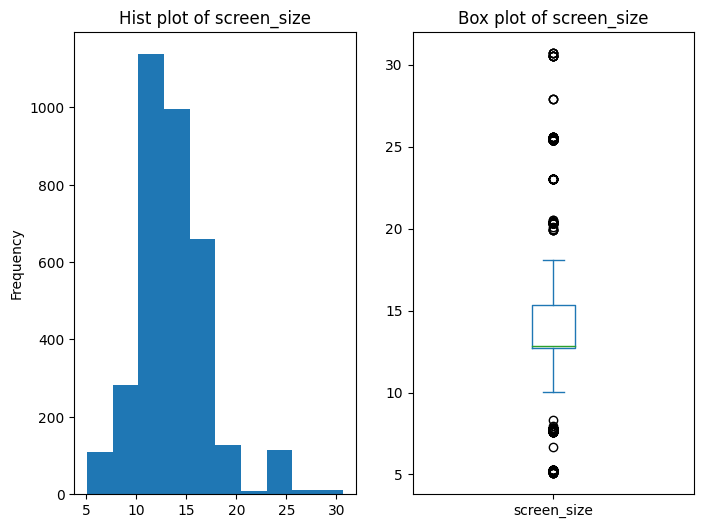

`screen_size` skew right, have outlier

=====
central tendency of rear_camera_mp: {'mean': 9.384533873769543, 'median': 8.0, 'mode': 13.0, 'min': 0.08, 'max': 48.0, 'range': 47.92}
=====
Dispersion of rear_camera_mp: 
 {'range': 47.92, 'q1': 5.0, 'q3': 13.0, 'iqr': 8.0, 'var': 22.091393338991246, 'skew': 0.8273189423194105, 'kurtosis': 5.187120762183382}
=====


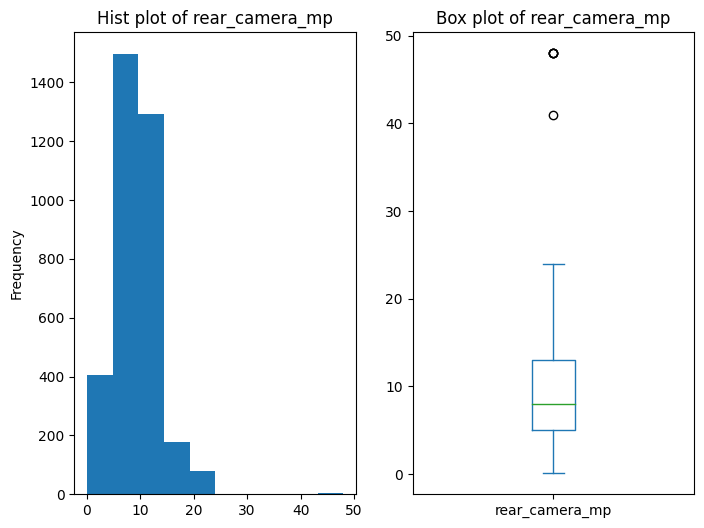

`rear_camera_mp` skew right, have outlier

=====
central tendency of front_camera_mp: {'mean': 6.553329473074696, 'median': 5.0, 'mode': 5.0, 'min': 0.0, 'max': 32.0, 'range': 32.0}
=====
Dispersion of front_camera_mp: 
 {'range': 32.0, 'q1': 2.0, 'q3': 8.0, 'iqr': 6.0, 'var': 48.55934164814933, 'skew': 1.8024735831495162, 'kurtosis': 3.339100539259933}
=====


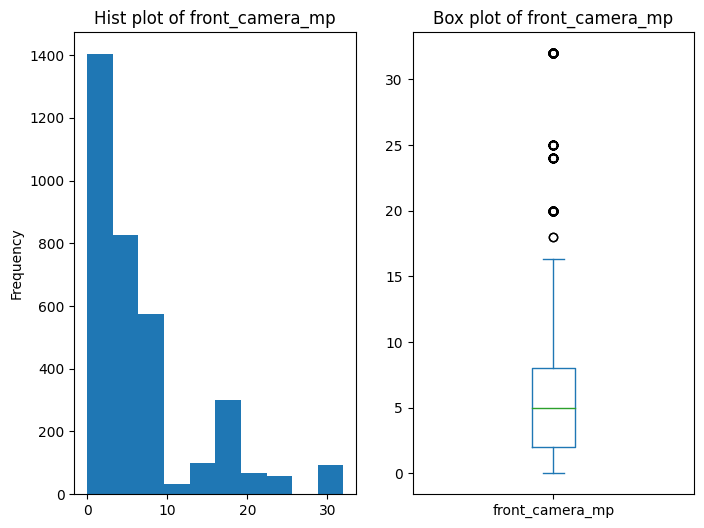

`front_camera_mp` shape is not good, have outlier

=====
central tendency of internal_memory: {'mean': 54.54695715112913, 'median': 32.0, 'mode': 16.0, 'min': 0.01, 'max': 1024.0, 'range': 1023.99}
=====
Dispersion of internal_memory: 
 {'range': 1023.99, 'q1': 16.0, 'q3': 64.0, 'iqr': 48.0, 'var': 7212.529246718697, 'skew': 5.798296666968713, 'kurtosis': 48.02079074689685}
=====


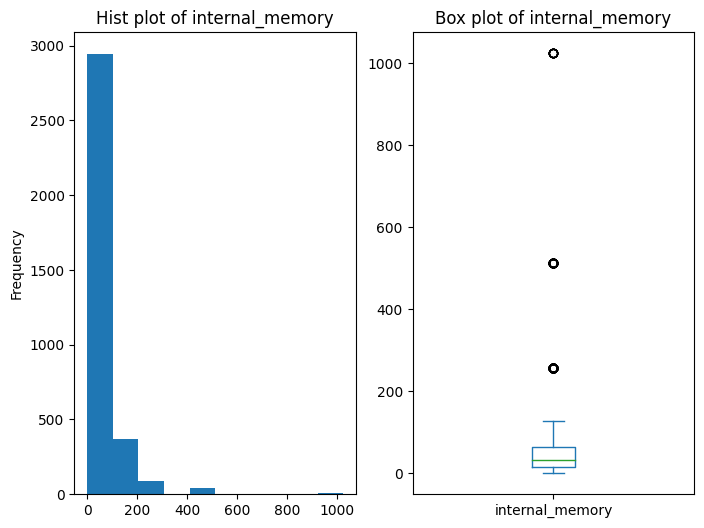

`internal_memory` skew right, have outlier

=====
central tendency of ram: {'mean': 4.036079907353792, 'median': 4.0, 'mode': 4.0, 'min': 0.02, 'max': 12.0, 'range': 11.98}
=====
Dispersion of ram: 
 {'range': 11.98, 'q1': 4.0, 'q3': 4.0, 'iqr': 0.0, 'var': 1.8613535250349174, 'skew': 1.069887513181793, 'kurtosis': 8.626853039000398}
=====


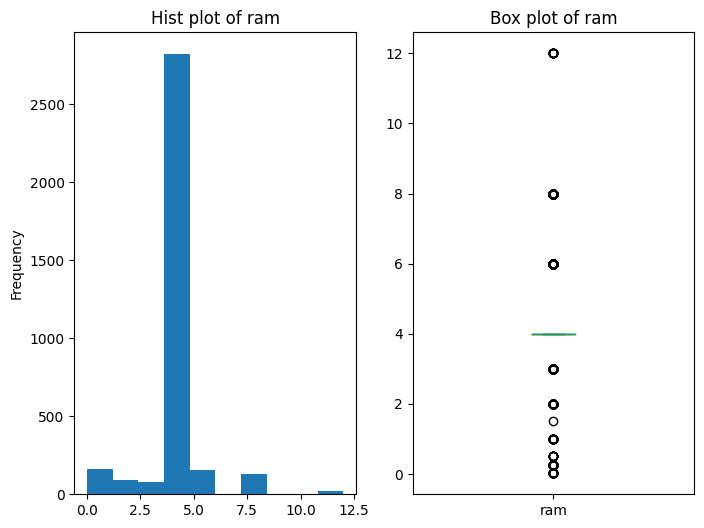

`ram` shape is not good, have many outlier

=====
central tendency of battery: {'mean': 3133.1709612044006, 'median': 3000.0, 'mode': 4000.0, 'min': 500.0, 'max': 9720.0, 'range': 9220.0}
=====
Dispersion of battery: 
 {'range': 9220.0, 'q1': 2100.0, 'q3': 4000.0, 'iqr': 1900.0, 'var': 1686271.2198949924, 'skew': 1.3339248260239134, 'kurtosis': 3.324206548371876}
=====


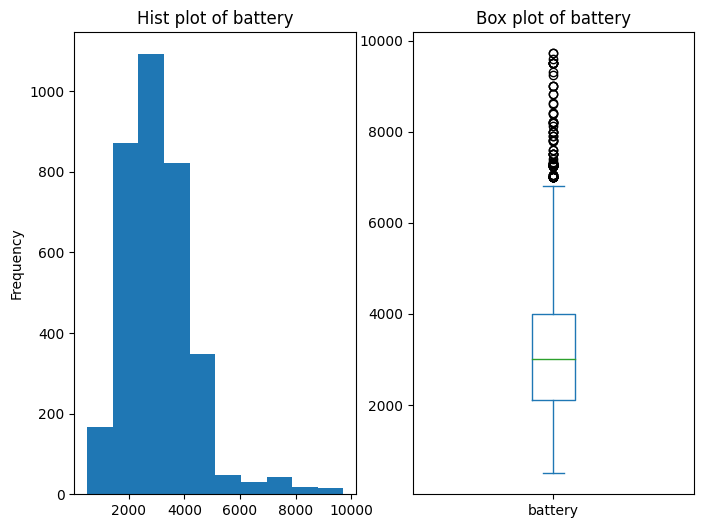

`battery` shape is not good and have many outlier

=====
central tendency of weight: {'mean': 182.7057614360162, 'median': 160.0, 'mode': 150.0, 'min': 69.0, 'max': 855.0, 'range': 786.0}
=====
Dispersion of weight: 
 {'range': 786.0, 'q1': 142.0, 'q3': 185.0, 'iqr': 43.0, 'var': 7802.099517911214, 'skew': 3.2366565276111565, 'kurtosis': 12.549979127567994}
=====


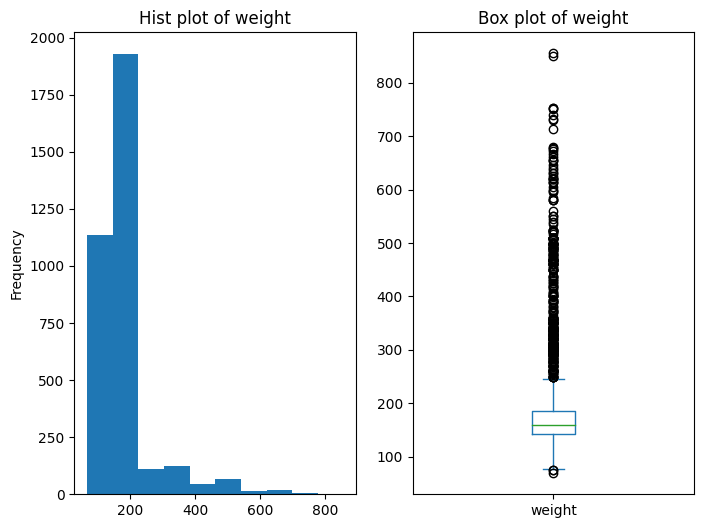

`weight` shape is not good and have many outlier

=====
central tendency of days_used: {'mean': 674.8697162709901, 'median': 690.5, 'mode': 564, 'min': 91, 'max': 1094, 'range': 1003}
=====
Dispersion of days_used: 
 {'range': 1003, 'q1': 533.5, 'q3': 868.75, 'iqr': 335.25, 'var': 61792.098862531704, 'skew': -0.34397722518149887, 'kurtosis': -0.683586444129737}
=====


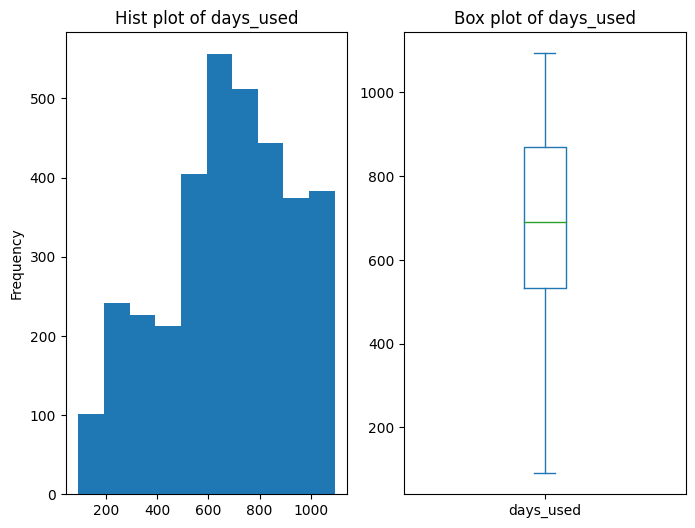

`days_used` shape is not good and have no outlier

=====
central tendency of normalized_new_price: {'mean': 5.2331071719030104, 'median': 5.2458918494999995, 'mode': 5.135739612, 'min': 2.901421594, 'max': 7.847840659, 'range': 4.946419065000001}
=====
Dispersion of normalized_new_price: 
 {'range': 4.946419065000001, 'q1': 4.7903418435, 'q3': 5.67371825, 'iqr': 0.8833764065, 'var': 0.46735933292532905, 'skew': -0.07702603975602992, 'kurtosis': 0.6526560701710067}
=====


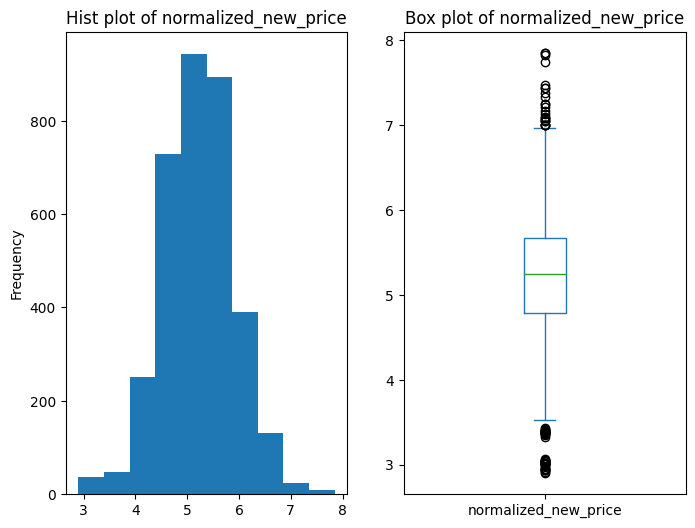

`normalized_new_price` shape is good and have many outlier

### Output Numerical analysis

=====
central tendency of normalized_used_price: {'mean': 4.364712079133179, 'median': 4.405132623, 'mode': 3.535145354, 'min': 1.53686722, 'max': 6.619433002, 'range': 5.082565782}
=====
Dispersion of normalized_used_price: 
 {'range': 5.082565782, 'q1': 4.0339308525, 'q3': 4.7557000075, 'iqr': 0.7217691549999996, 'var': 0.34681924928918034, 'skew': -0.5323378175277198, 'kurtosis': 1.1788274061623172}
=====


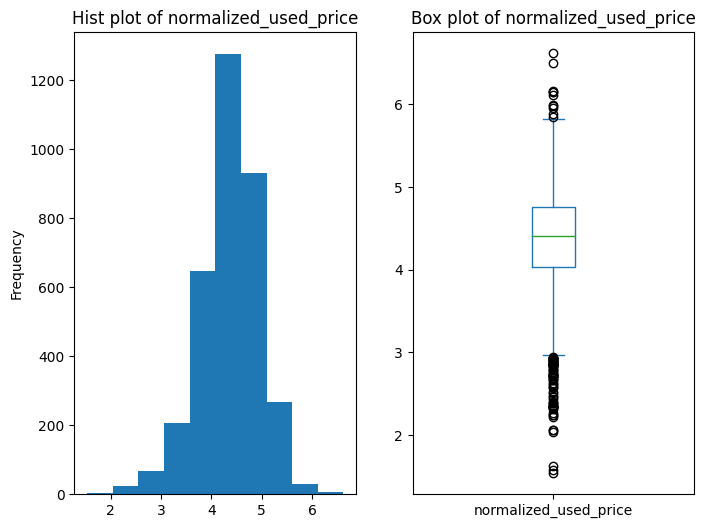

`normalized_used_price` have many outlier

## Handle uncommon catgory

Before group uncommon category to Rare 
: Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: device_brand, dtype: int64
After group uncommon category to Rare 
: Others       502
Samsung      341
Huawei       251
LG           201
Lenovo       171
ZTE          140
Xiaomi       132
Oppo         129
Asus         122
Alcatel      121
Micromax     117
Vivo         117
Honor        116
Rare         113
HTC          110
Nokia        106


## Bi-variate analysis

### Continuous vs Continuous (Input and Output)

screen_size  rear_camera_mp  front_camera_mp  \
screen_size               1.000000        0.139385         0.271615   
rear_camera_mp            0.139385        1.000000         0.373565   
front_camera_mp           0.271615        0.373565         1.000000   
internal_memory           0.071746        0.009507         0.296531   
ram                       0.273810        0.211150         0.477191   
battery                   0.811240        0.225791         0.369661   
weight                    0.828872       -0.088483        -0.004688   
days_used                -0.291723       -0.108173        -0.552377   
normalized_new_price      0.460889        0.512655         0.474444   
normalized_used_price     0.614785        0.552477         0.607548   

                       internal_memory       ram   battery    weight  \
screen_size                   0.071746  0.273810  0.811240  0.828872   
rear_camera_mp                0.009507  0.211150  0.225791 -0.088483   
front_camera_mp               0.296531  0.477191  0.369661 -0.004688   
internal_memory               1.000000  0.122774  0.118108  0.015374   
ram                           0.122774  1.000000  0.280224  0.089901   
battery                       0.118108  0.280224  1.000000  0.699772   
weight                        0.015374  0.089901  0.699772  1.000000   
days_used                    -0.242377 -0.279737 -0.370623 -0.067747   
normalized_new_price          0.196067  0.530363  0.469762  0.269694   
normalized_used_price         0.190954  0.518783  0.612041  0.382456   

                       days_used  normalized_new_price  normalized_used_price  
screen_size            -0.291723              0.460889               0.614785  
rear_camera_mp         -0.108173              0.512655               0.552477  
front_camera_mp        -0.552377              0.474444               0.607548  
internal_memory        -0.242377              0.196067               0.190954  
ram                    -0.279737              0.530363               0.518783  
battery                -0.370623              0.469762               0.612041  
weight                 -0.067747              0.269694               0.382456  
days_used               1.000000             -0.216625              -0.358264  
normalized_new_price   -0.216625              1.000000               0.834496  
normalized_used_price  -0.358264              0.834496               1.000000

Seem `internal_memory`, `weight` and `days_used` not have strong relation with `normalized_used_price`. Consider to drop

### Input Category vs Input Category 

[{'device_brand', 'os'},
 {'device_brand', 'release_year'},
 {'device_brand', 'internet'},
 {'os', 'release_year'},
 {'internet', 'os'},
 {'internet', 'release_year'}]

=====Analyze of os and device_brand=====


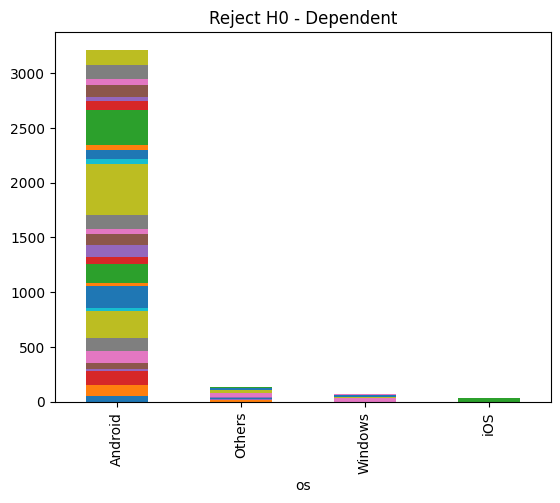

=====Analyze of release_year and device_brand=====


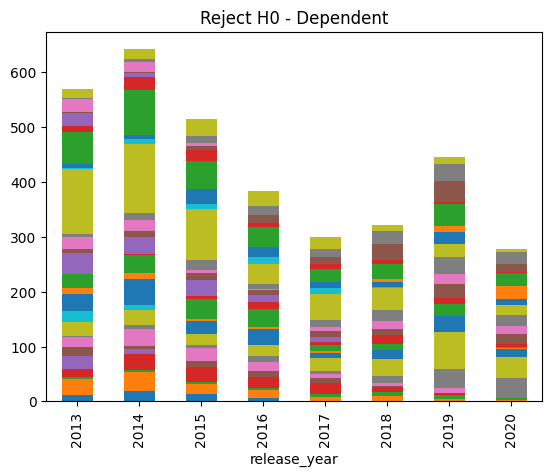

=====Analyze of internet and device_brand=====


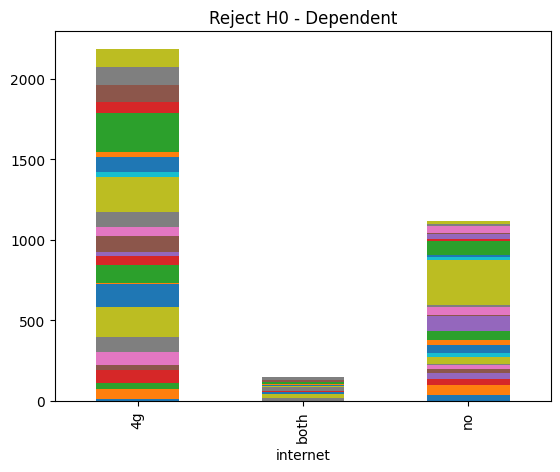

=====Analyze of release_year and os=====


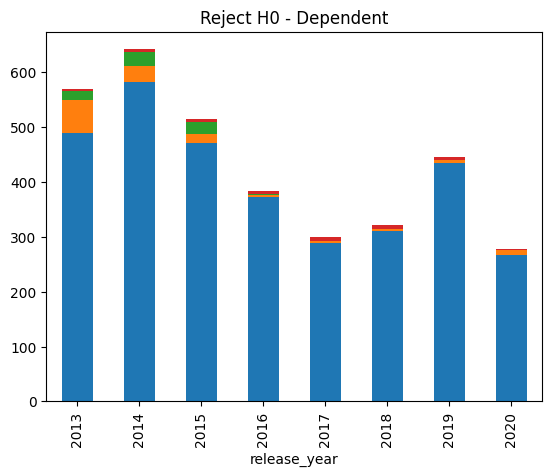

=====Analyze of internet and os=====


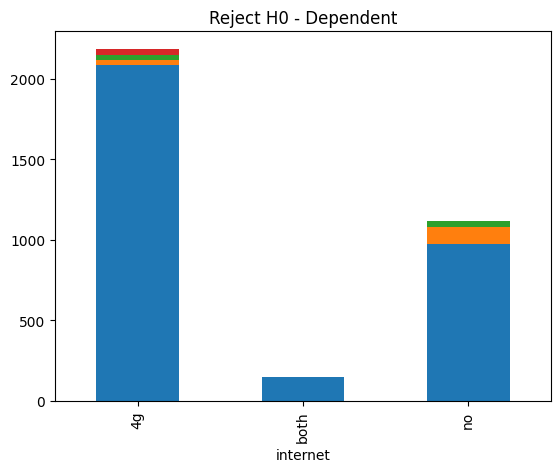

=====Analyze of internet and release_year=====


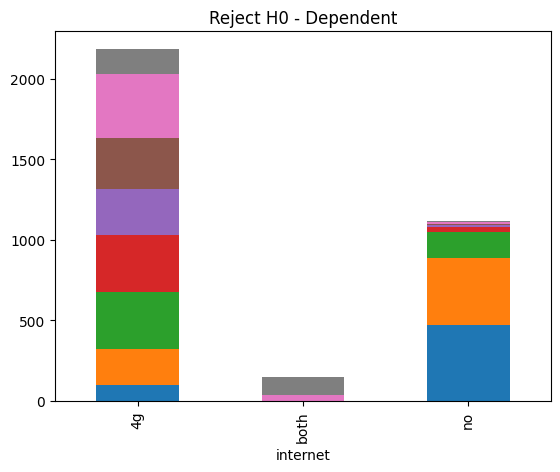

var1          var2                 result
0            os  device_brand  Reject H0 - Dependent
1  release_year  device_brand  Reject H0 - Dependent
2      internet  device_brand  Reject H0 - Dependent
3  release_year            os  Reject H0 - Dependent
4      internet            os  Reject H0 - Dependent
5      internet  release_year  Reject H0 - Dependent

Most of category depend each others

### Output Continuous vs Input Category 

['device_brand', 'os', 'release_year', 'internet']

                     sum_sq      df          F         PR(>F)
C(device_brand)  311.916793    28.0  43.080342  1.897047e-200
Residual         885.650075  3425.0        NaN            NaN


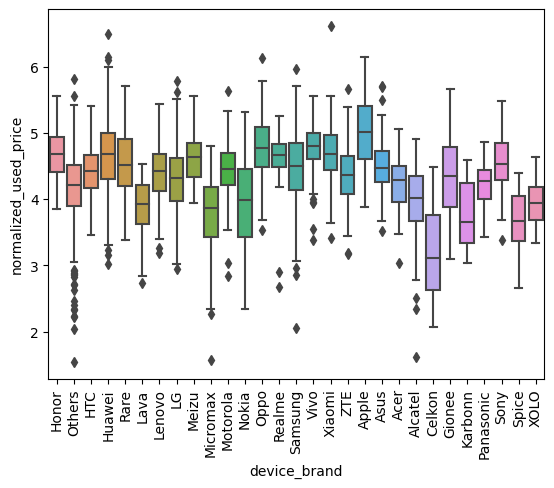

               sum_sq      df           F         PR(>F)
C(os)      174.870233     3.0  196.637752  1.000128e-117
Residual  1022.696635  3450.0         NaN            NaN


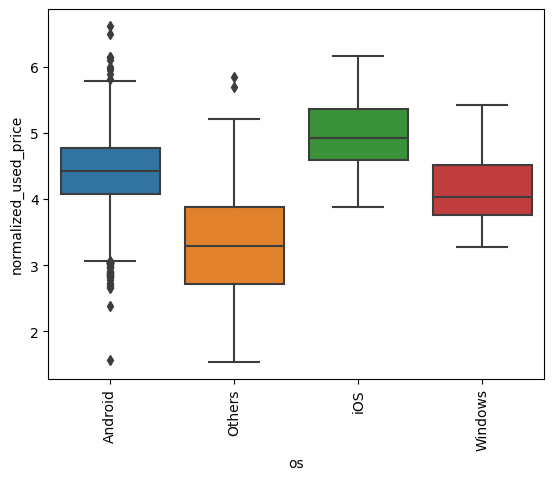

                     sum_sq      df           F         PR(>F)
C(release_year)  320.206403     7.0  179.667359  2.113889e-227
Residual         877.360465  3446.0         NaN            NaN


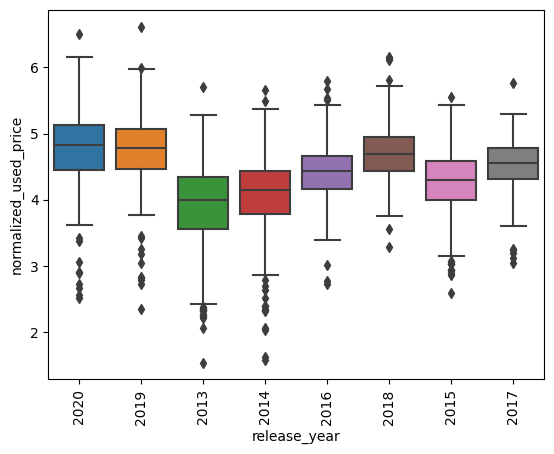

                 sum_sq      df           F  PR(>F)
C(internet)  428.957941     2.0  962.995488     0.0
Residual     768.608926  3451.0         NaN     NaN


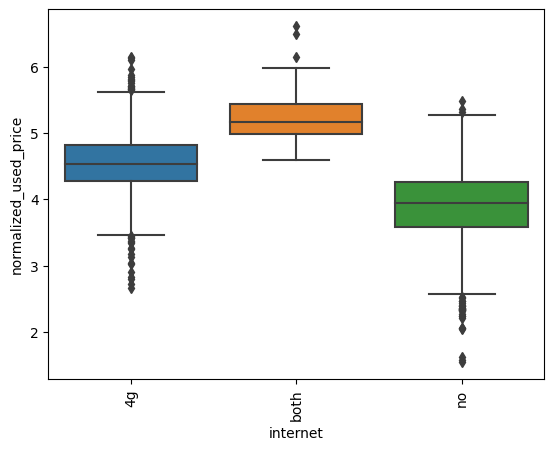

### Input Category vs Input Continuous 

['screen_size',
 'rear_camera_mp',
 'front_camera_mp',
 'internal_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_new_price']

['device_brand', 'os', 'release_year', 'internet']

device_brand       os release_year internet  screen_size  rear_camera_mp  \
0        Honor  Android         2020       4g        14.50            13.0   
1        Honor  Android         2020     both        17.30            13.0   
2        Honor  Android         2020     both        16.69            13.0   
3        Honor  Android         2020     both        25.50            13.0   
4        Honor  Android         2020       4g        15.32            13.0   

   front_camera_mp  internal_memory  ram  battery  weight  days_used  \
0              5.0             64.0  3.0   3020.0   146.0        127   
1             16.0            128.0  8.0   4300.0   213.0        325   
2              8.0            128.0  8.0   4200.0   213.0        162   
3              8.0             64.0  6.0   7250.0   480.0        345   
4              8.0             64.0  3.0   5000.0   185.0        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837

                       sum_sq      df          F        PR(>F)
C(device_brand)   7387.084749    28.0  21.204826  3.908520e-98
Residual         42612.882931  3425.0        NaN           NaN


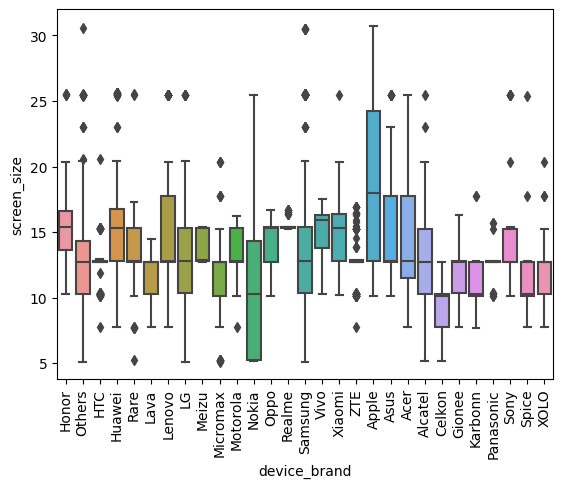

                       sum_sq      df          F         PR(>F)
C(device_brand)  14691.276891    28.0  29.177612  7.523849e-137
Residual         61590.304308  3425.0        NaN            NaN


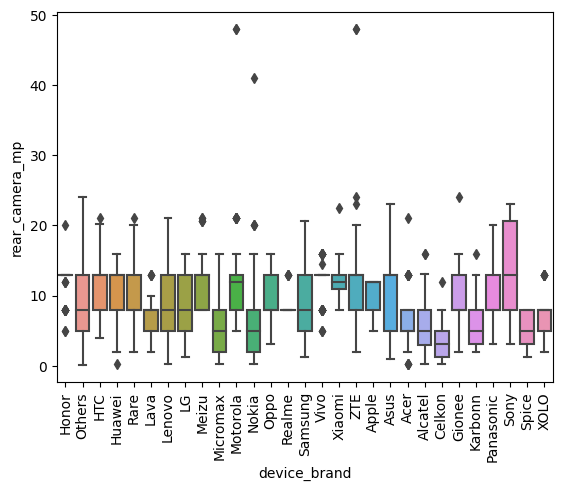

                        sum_sq      df          F         PR(>F)
C(device_brand)   44745.301160    28.0  44.523749  8.967051e-207
Residual         122930.105551  3425.0        NaN            NaN


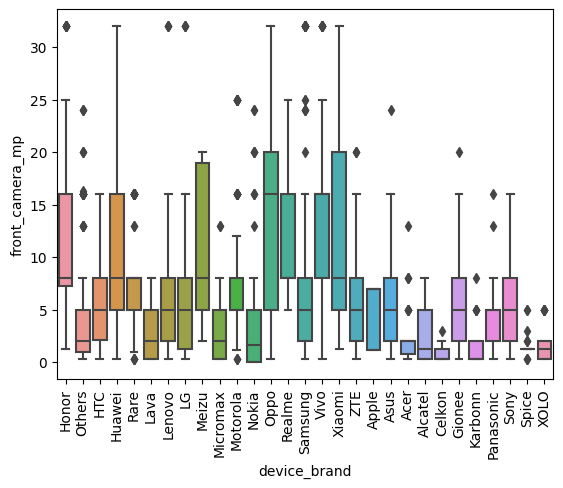

                       sum_sq      df         F        PR(>F)
C(device_brand)  2.139844e+06    28.0  11.49785  4.269357e-49
Residual         2.276502e+07  3425.0       NaN           NaN


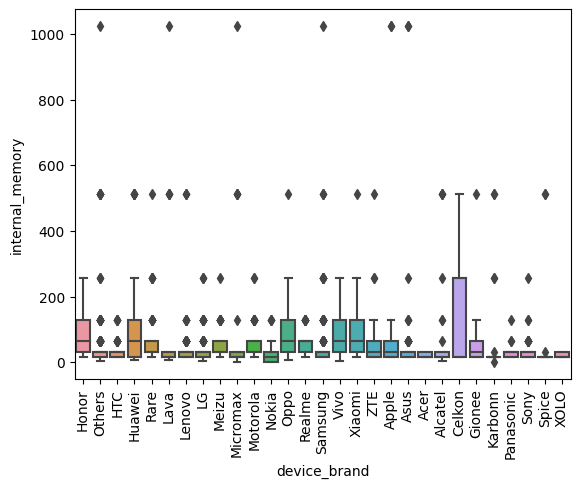

                      sum_sq      df          F         PR(>F)
C(device_brand)   969.299685    28.0  21.723547  1.058130e-100
Residual         5457.954037  3425.0        NaN            NaN


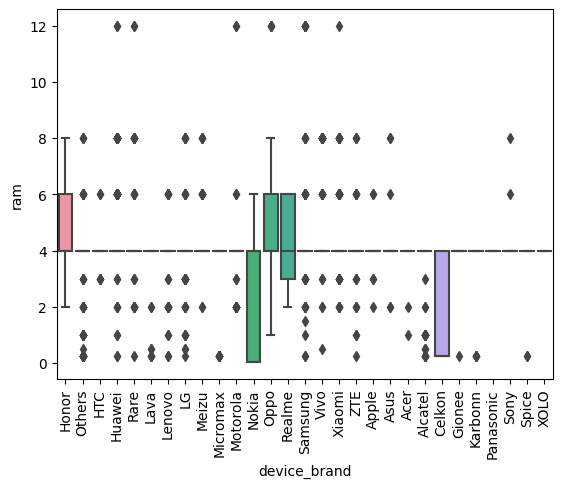

                       sum_sq      df          F         PR(>F)
C(device_brand)  1.076052e+09    28.0  27.729966  6.094602e-130
Residual         4.746642e+09  3425.0        NaN            NaN


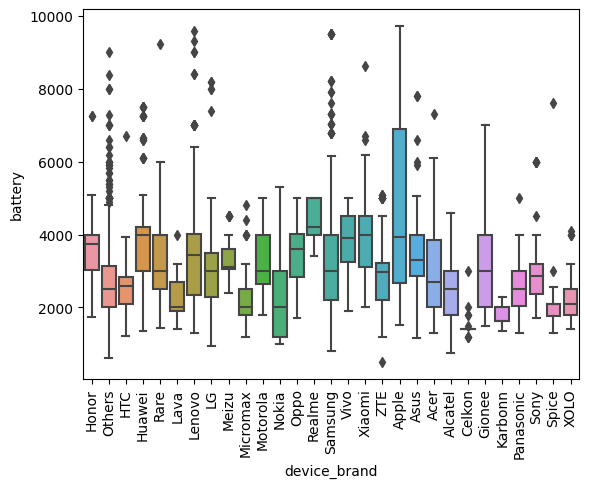

                       sum_sq      df          F        PR(>F)
C(device_brand)  2.583243e+06    28.0  12.972892  1.237851e-56
Residual         2.435741e+07  3425.0        NaN           NaN


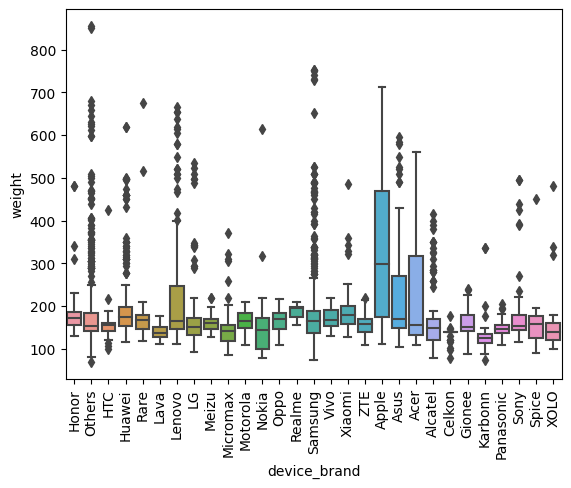

                       sum_sq      df         F         PR(>F)
C(device_brand)  3.807980e+07    28.0  26.57322  2.209760e-124
Residual         1.752883e+08  3425.0       NaN            NaN


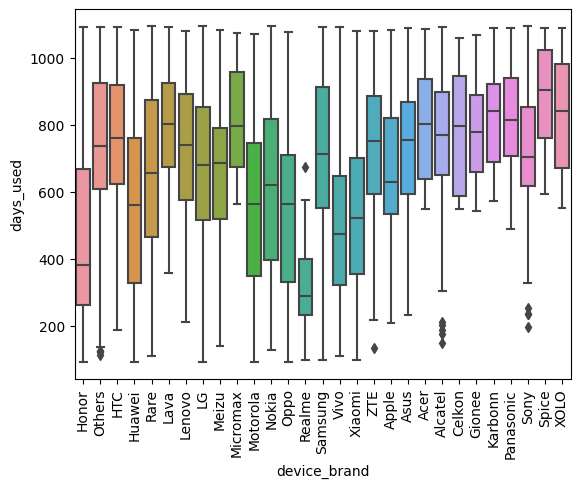

                      sum_sq      df         F         PR(>F)
C(device_brand)   405.796384    28.0  41.09088  1.201639e-191
Residual         1207.995392  3425.0       NaN            NaN


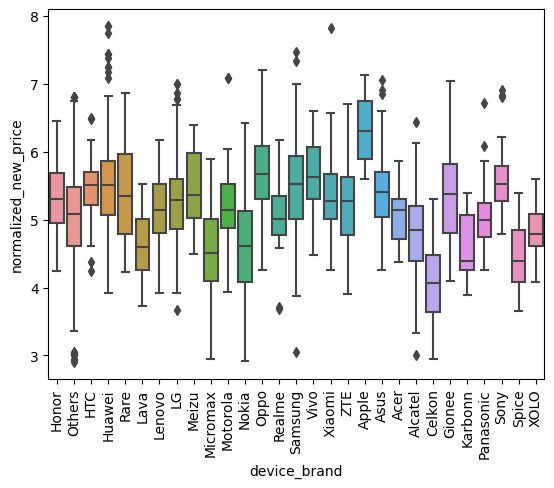

                sum_sq      df           F         PR(>F)
C(os)      6803.804187     3.0  181.135874  4.558138e-109
Residual  43196.163493  3450.0         NaN            NaN


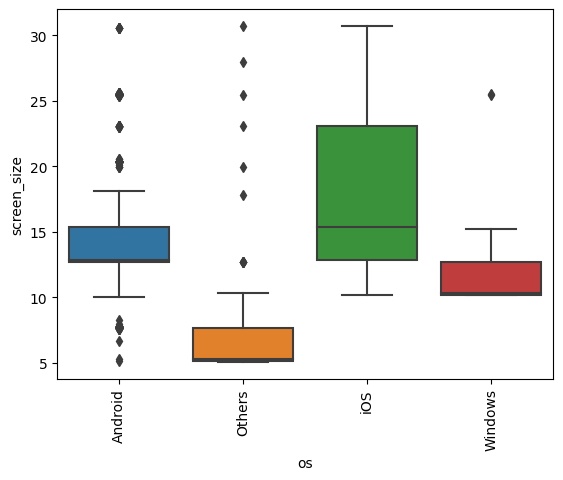

                sum_sq      df           F        PR(>F)
C(os)      6112.858941     3.0  100.184064  3.531743e-62
Residual  70168.722258  3450.0         NaN           NaN


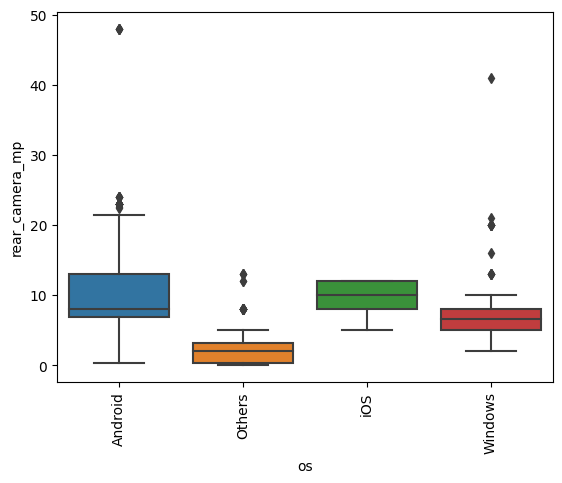

                 sum_sq      df          F        PR(>F)
C(os)       5392.445718     3.0  38.212962  2.750882e-24
Residual  162282.960993  3450.0        NaN           NaN


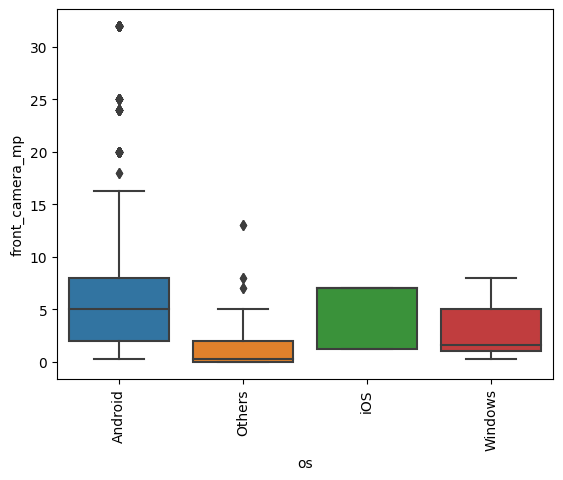

                sum_sq      df       F   PR(>F)
C(os)     1.082555e+05     3.0  5.0206  0.00179
Residual  2.479661e+07  3450.0     NaN      NaN


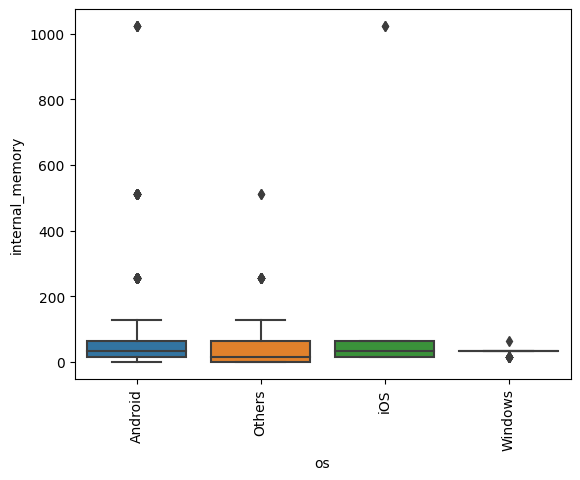

               sum_sq      df           F        PR(>F)
C(os)      638.874116     3.0  126.927618  5.466581e-78
Residual  5788.379606  3450.0         NaN           NaN


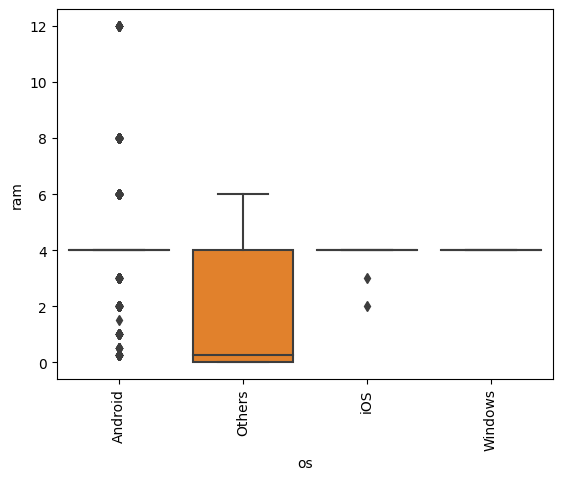

                sum_sq      df          F        PR(>F)
C(os)     3.858377e+08     3.0  81.612103  5.242766e-51
Residual  5.436857e+09  3450.0        NaN           NaN


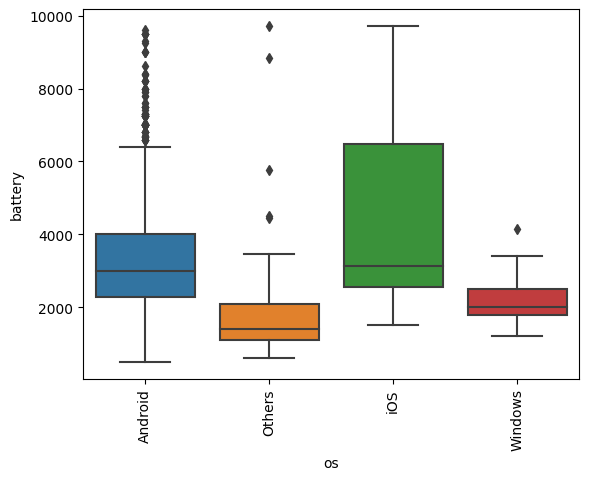

                sum_sq      df          F        PR(>F)
C(os)     9.149409e+05     3.0  40.428564  1.136284e-25
Residual  2.602571e+07  3450.0        NaN           NaN


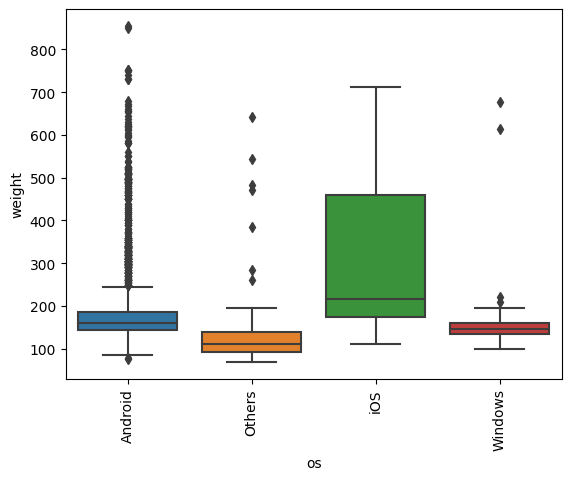

                sum_sq      df          F        PR(>F)
C(os)     2.119459e+06     3.0  11.537954  1.594700e-07
Residual  2.112487e+08  3450.0        NaN           NaN


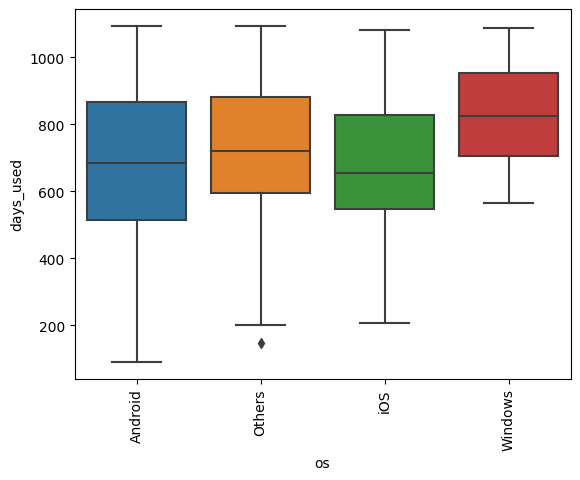

               sum_sq      df           F         PR(>F)
C(os)      241.851660     3.0  202.727077  4.223918e-121
Residual  1371.940116  3450.0         NaN            NaN


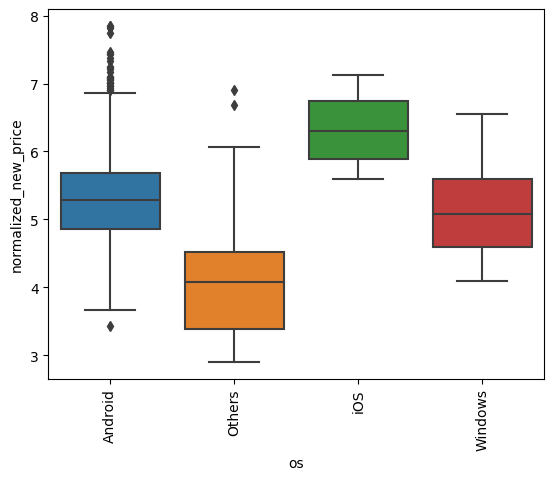

                       sum_sq      df          F         PR(>F)
C(release_year)   6952.287746     7.0  79.505143  2.527101e-107
Residual         43047.679935  3446.0        NaN            NaN


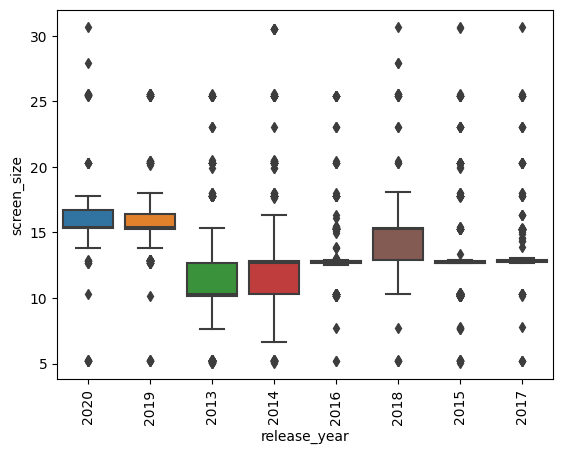

                       sum_sq      df           F         PR(>F)
C(release_year)  16825.396573     7.0  139.311031  2.908731e-181
Residual         59456.184627  3446.0         NaN            NaN


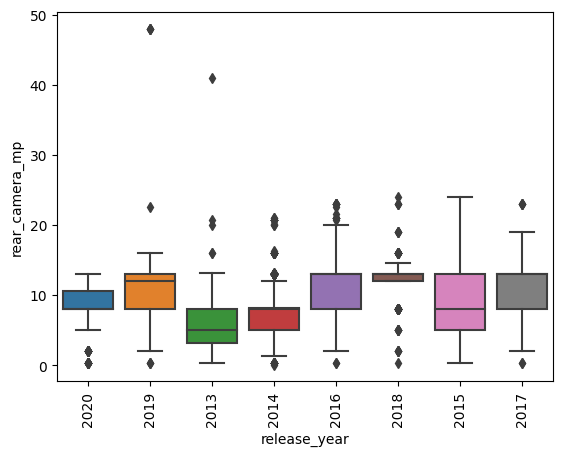

                       sum_sq      df          F  PR(>F)
C(release_year)  82622.099112     7.0  478.21396     0.0
Residual         85053.307599  3446.0        NaN     NaN


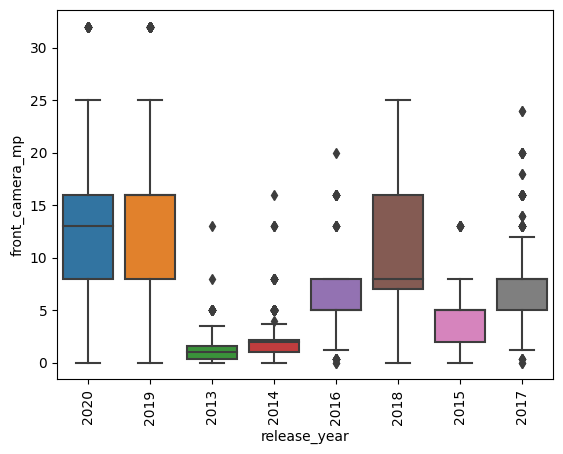

                       sum_sq      df         F        PR(>F)
C(release_year)  2.293365e+06     7.0  49.92994  4.997769e-68
Residual         2.261150e+07  3446.0       NaN           NaN


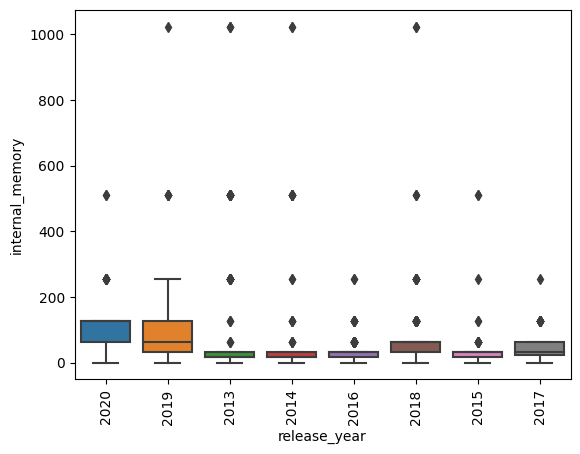

                      sum_sq      df          F        PR(>F)
C(release_year)   812.354468     7.0  71.223094  1.649177e-96
Residual         5614.899254  3446.0        NaN           NaN


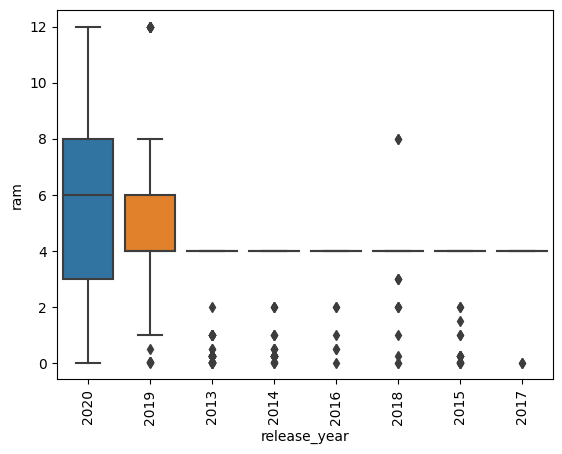

                       sum_sq      df           F         PR(>F)
C(release_year)  1.396586e+09     7.0  155.332721  6.447643e-200
Residual         4.426108e+09  3446.0         NaN            NaN


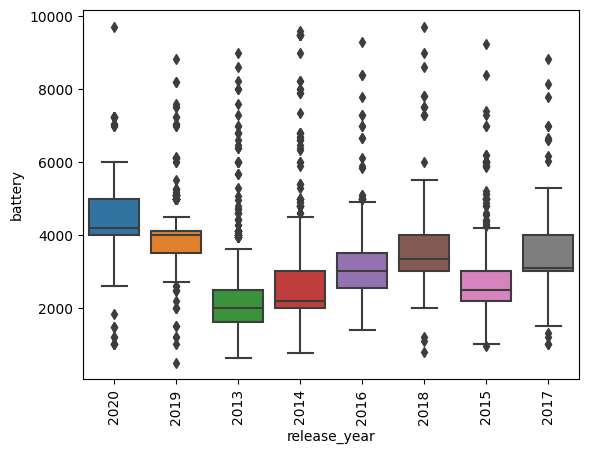

                       sum_sq      df         F   PR(>F)
C(release_year)  2.493297e+05     7.0  4.598554  0.00004
Residual         2.669132e+07  3446.0       NaN      NaN


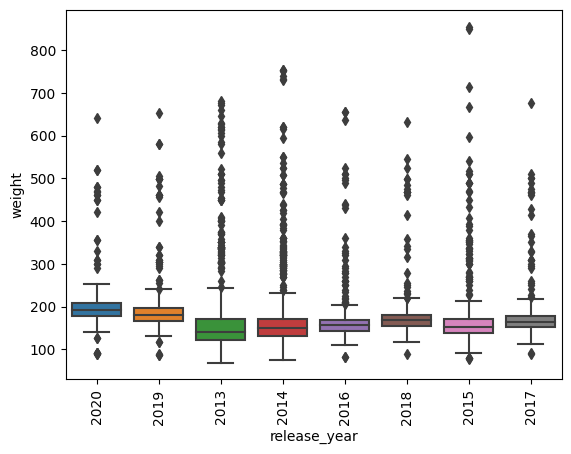

                       sum_sq      df            F  PR(>F)
C(release_year)  1.458987e+08     7.0  1064.540163     0.0
Residual         6.746938e+07  3446.0          NaN     NaN


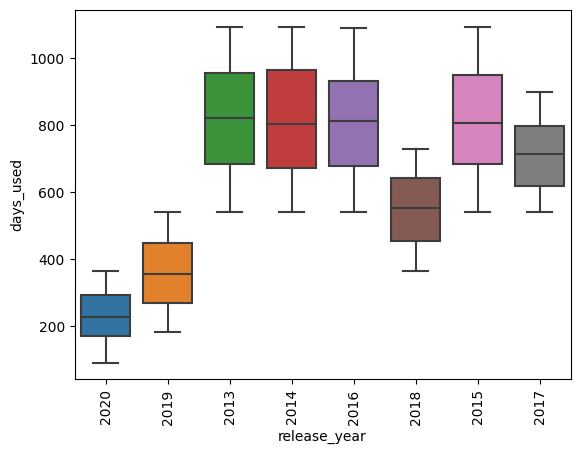

                      sum_sq      df         F        PR(>F)
C(release_year)   160.697127     7.0  54.44167  3.823838e-74
Residual         1453.094650  3446.0       NaN           NaN


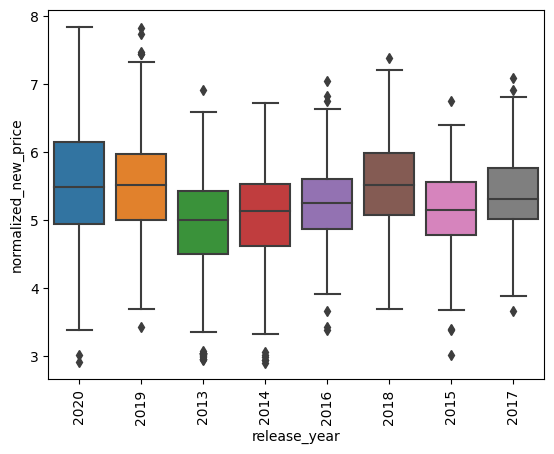

                   sum_sq      df           F        PR(>F)
C(internet)   4197.909414     2.0  158.147755  1.926640e-66
Residual     45802.058266  3451.0         NaN           NaN


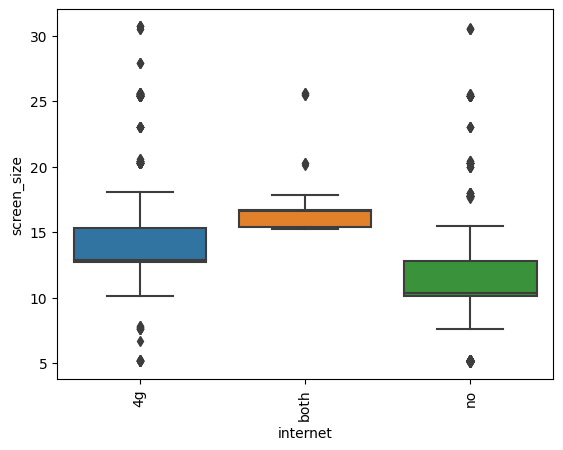

                   sum_sq      df           F         PR(>F)
C(internet)  22531.399376     2.0  723.307872  4.522859e-263
Residual     53750.181824  3451.0         NaN            NaN


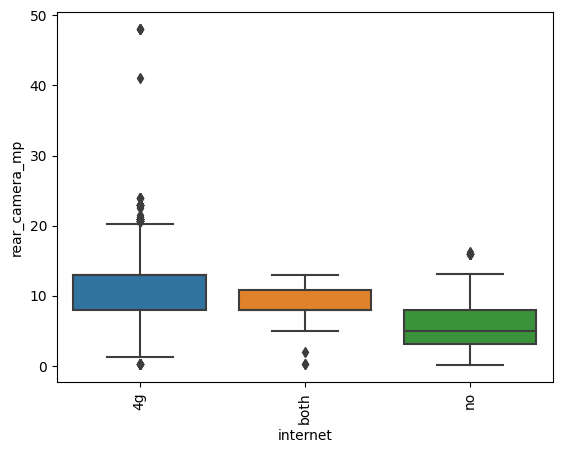

                    sum_sq      df          F         PR(>F)
C(internet)   57228.759075     2.0  894.08077  1.373440e-313
Residual     110446.647636  3451.0        NaN            NaN


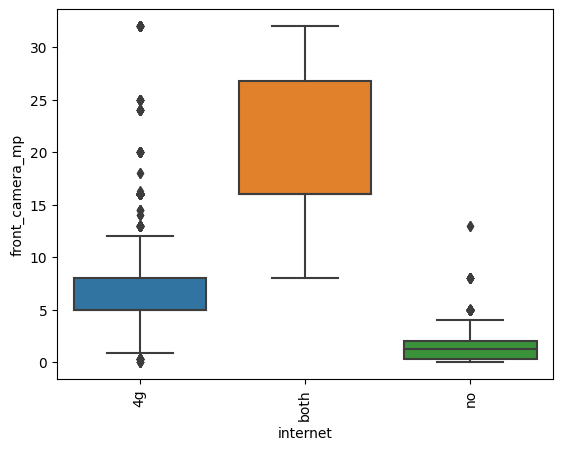

                   sum_sq      df           F        PR(>F)
C(internet)  1.723038e+06     2.0  128.251387  1.878994e-54
Residual     2.318183e+07  3451.0         NaN           NaN


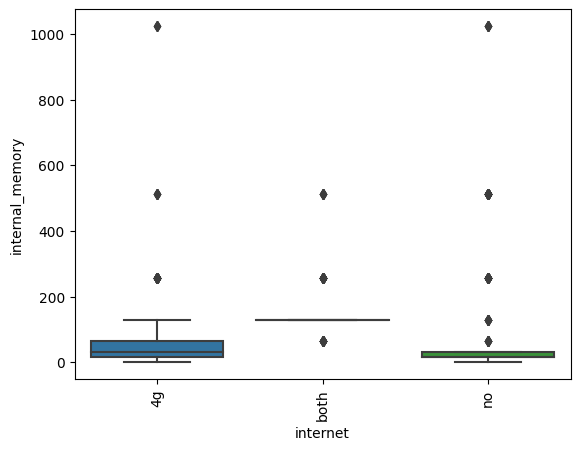

                  sum_sq      df          F  PR(>F)
C(internet)  2286.549050     2.0  952.84274     0.0
Residual     4140.704672  3451.0        NaN     NaN


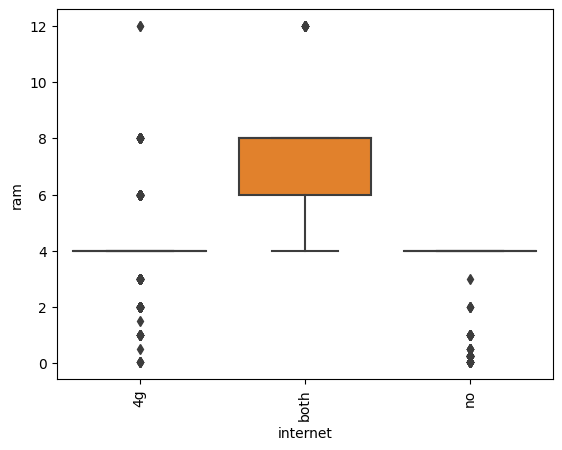

                   sum_sq      df           F         PR(>F)
C(internet)  1.032584e+09     2.0  371.958669  5.185466e-147
Residual     4.790111e+09  3451.0         NaN            NaN


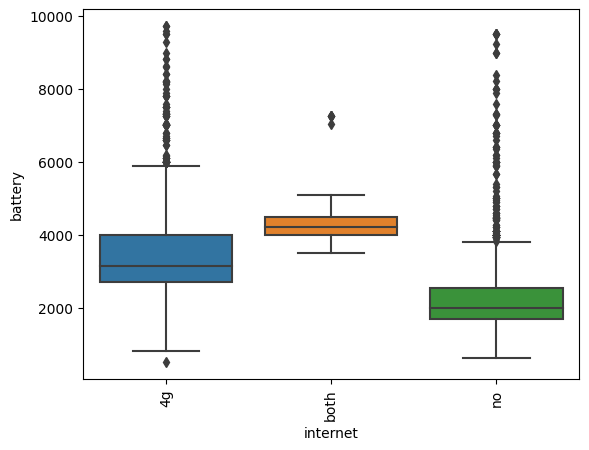

                   sum_sq      df         F    PR(>F)
C(internet)  1.007589e+05     2.0  6.477653  0.001556
Residual     2.683989e+07  3451.0       NaN       NaN


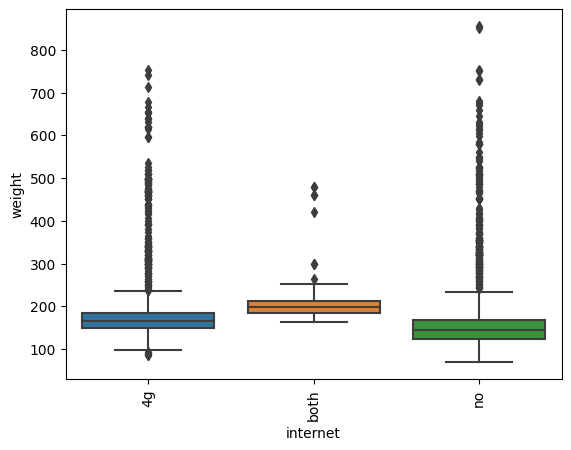

                   sum_sq      df           F         PR(>F)
C(internet)  4.836381e+07     2.0  505.755007  2.371982e-193
Residual     1.650043e+08  3451.0         NaN            NaN


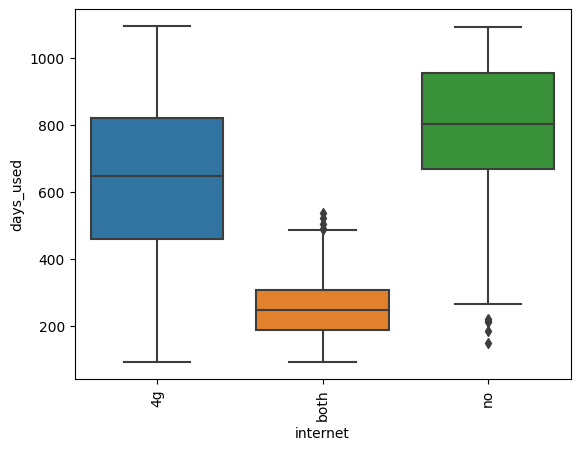

                  sum_sq      df           F         PR(>F)
C(internet)   462.991933     2.0  694.206368  4.114215e-254
Residual     1150.799844  3451.0         NaN            NaN


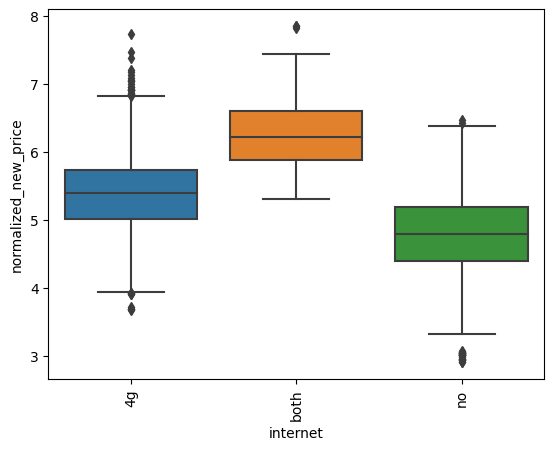

## Detect Outlier and treatment

Seem we have many outlier, we can seperate into 2 case.  
* Keep all outlier and apply RobustScaler
* Remove all outlier and apply MinMaxScaler

### Case 1: Keep all outlier

### Case 2: Remove all oulier

variable screen_size have 7.296% upper outlier
variable screen_size have 5.732% lower outlier
variable rear_camera_mp have 0.145% upper outlier
variable rear_camera_mp have 0.0% lower outlier
variable front_camera_mp have 6.398% upper outlier
variable front_camera_mp have 0.0% lower outlier
variable internal_memory have 3.995% upper outlier
variable internal_memory have 0.0% lower outlier
variable ram have 8.743% upper outlier
variable ram have 9.641% lower outlier
variable battery have 2.229% upper outlier
variable battery have 0.0% lower outlier
variable weight have 10.567% upper outlier
variable weight have 0.087% lower outlier
Variable days_used have no outlier
variable normalized_new_price have 0.695% upper outlier
variable normalized_new_price have 1.216% lower outlier


Int64Index([ 516,  520, 2574,   19,   20,   21,   31,  558, 1074, 2612,
            ...
             963,  964,  965,  966,  967,  968,  969,  970,  971, 1001],
           dtype='int64', length=102)

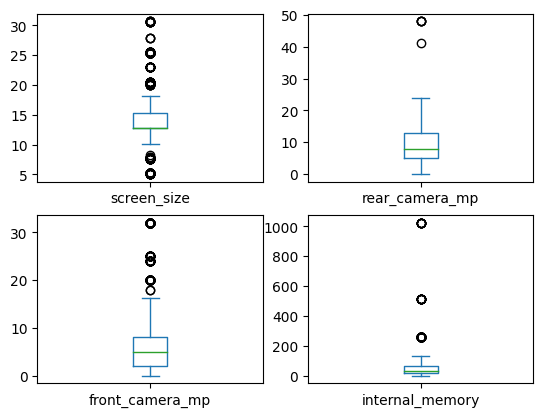

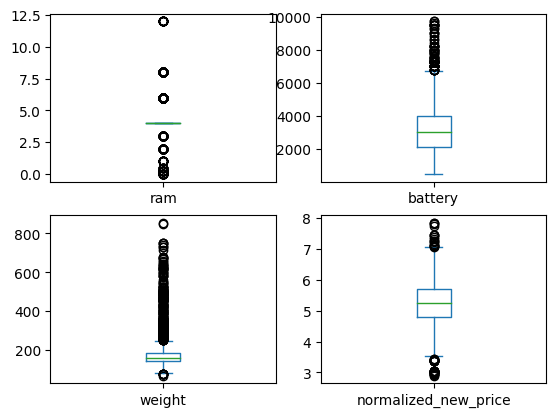

Finally, we have 2 case
* `_df_mobile_in_keep` which keep all outlier 
* `_df_mobile_in_remove_outlier` which remove outlier intersection between all numeric variables

## Data Standardization

device_brand       os release_year internet  screen_size  rear_camera_mp  \
0        Honor  Android         2020       4g        14.50            13.0   
1        Honor  Android         2020     both        17.30            13.0   
2        Honor  Android         2020     both        16.69            13.0   
3        Honor  Android         2020     both        25.50            13.0   
4        Honor  Android         2020       4g        15.32            13.0   

   front_camera_mp  internal_memory  ram  battery  weight  days_used  \
0              5.0             64.0  3.0   3020.0   146.0        127   
1             16.0            128.0  8.0   4300.0   213.0        325   
2              8.0            128.0  8.0   4200.0   213.0        162   
3              8.0             64.0  6.0   7250.0   480.0        345   
4              8.0             64.0  3.0   5000.0   185.0        293   

   normalized_new_price  normalized_used_price  
0              4.715100               4.307572  
1              5.519018               5.162097  
2              5.884631               5.111084  
3              5.630961               5.135387  
4              4.947837               4.389995

device_brand       os release_year internet  screen_size  rear_camera_mp  \
0        Honor  Android         2020       4g        14.50            13.0   
1        Honor  Android         2020     both        17.30            13.0   
2        Honor  Android         2020     both        16.69            13.0   
3        Honor  Android         2020     both        25.50            13.0   
4        Honor  Android         2020       4g        15.32            13.0   

   front_camera_mp  internal_memory  ram  battery  weight  days_used  \
0              5.0             64.0  3.0   3020.0   146.0        127   
1             16.0            128.0  8.0   4300.0   213.0        325   
2              8.0            128.0  8.0   4200.0   213.0        162   
3              8.0             64.0  6.0   7250.0   480.0        345   
4              8.0             64.0  3.0   5000.0   185.0        293   

   normalized_new_price  normalized_used_price  
0              4.715100               4.307572  
1              5.519018               5.162097  
2              5.884631               5.111084  
3              5.630961               5.135387  
4              4.947837               4.389995

### Scaler for non outlier data

In [66]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

device_brand       os release_year internet  screen_size  rear_camera_mp  \
0        Honor  Android         2020       4g        14.50            13.0   
1        Honor  Android         2020     both        17.30            13.0   
2        Honor  Android         2020     both        16.69            13.0   
3        Honor  Android         2020     both        25.50            13.0   
4        Honor  Android         2020       4g        15.32            13.0   

   front_camera_mp  internal_memory  ram  battery  ...  normalized_used_price  \
0              5.0             64.0  3.0   3020.0  ...               4.307572   
1             16.0            128.0  8.0   4300.0  ...               5.162097   
2              8.0            128.0  8.0   4200.0  ...               5.111084   
3              8.0             64.0  6.0   7250.0  ...               5.135387   
4              8.0             64.0  3.0   5000.0  ...               4.389995   

   S_screen_size  S_rear_camera_mp  S_front_camera_mp  S_internal_memory  \
0       0.367538          0.269616            0.15625           0.062491   
1       0.476785          0.269616            0.50000           0.124991   
2       0.452985          0.269616            0.25000           0.124991   
3       0.796723          0.269616            0.25000           0.062491   
4       0.399532          0.269616            0.25000           0.062491   

      S_ram  S_battery  S_weight  S_days_used  S_normalized_new_price  
0  0.248748   0.273319  0.097964     0.035892                0.366665  
1  0.666110   0.412148  0.183206     0.233300                0.529190  
2  0.666110   0.401302  0.183206     0.070788                0.603105  
3  0.499165   0.732104  0.522901     0.253240                0.551821  
4  0.248748   0.488069  0.147583     0.201396                0.413717  

[5 rows x 23 columns]

### Scaler for outlier data

device_brand       os release_year internet  screen_size  rear_camera_mp  \
0        Honor  Android         2020       4g        14.50            13.0   
1        Honor  Android         2020     both        17.30            13.0   
2        Honor  Android         2020     both        16.69            13.0   
3        Honor  Android         2020     both        25.50            13.0   
4        Honor  Android         2020       4g        15.32            13.0   

   front_camera_mp  internal_memory  ram  battery  ...  normalized_used_price  \
0              5.0             64.0  3.0   3020.0  ...               4.307572   
1             16.0            128.0  8.0   4300.0  ...               5.162097   
2              8.0            128.0  8.0   4200.0  ...               5.111084   
3              8.0             64.0  6.0   7250.0  ...               5.135387   
4              8.0             64.0  3.0   5000.0  ...               4.389995   

   S_screen_size  S_rear_camera_mp  S_front_camera_mp  S_internal_memory  \
0       0.632576             0.625           0.000000           0.666667   
1       1.693182             0.625           1.833333           2.000000   
2       1.462121             0.625           0.500000           2.000000   
3       4.799242             0.625           0.500000           0.666667   
4       0.943182             0.625           0.500000           0.666667   

   S_ram  S_battery  S_weight  S_days_used  S_normalized_new_price  
0   -1.0   0.010526 -0.325581    -1.680835               -0.600867  
1    4.0   0.684211  1.232558    -1.090231                0.309184  
2    4.0   0.631579  1.232558    -1.576435                0.723065  
3    2.0   2.236842  7.441860    -1.030574                0.435906  
4   -1.0   1.052632  0.581395    -1.185682               -0.337404  

[5 rows x 23 columns]

Finally, we have 2 options:
* `_df_mobile_in_remove_outlier` for non outlier data which apply MinMaxScaler
* `_df_mobile_in_keep` for outlier data which apply RobustScaler

## Feature Engineering

### Encoder for non outlier data

device_brand       os release_year internet
0        Honor  Android         2020       4g
1        Honor  Android         2020     both
2        Honor  Android         2020     both
3        Honor  Android         2020     both
4        Honor  Android         2020       4g

release_year  screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
0         2020        14.50            13.0              5.0             64.0   
1         2020        17.30            13.0             16.0            128.0   
2         2020        16.69            13.0              8.0            128.0   
3         2020        25.50            13.0              8.0             64.0   
4         2020        15.32            13.0              8.0             64.0   

   ram  battery  weight  days_used  normalized_new_price  ...  E_Spice  \
0  3.0   3020.0   146.0        127              4.715100  ...        0   
1  8.0   4300.0   213.0        325              5.519018  ...        0   
2  8.0   4200.0   213.0        162              5.884631  ...        0   
3  6.0   7250.0   480.0        345              5.630961  ...        0   
4  3.0   5000.0   185.0        293              4.947837  ...        0   

   E_Vivo  E_XOLO  E_Xiaomi  E_ZTE  E_Others  E_Windows  E_iOS  E_both  E_no  
0       0       0         0      0         0          0      0       0     0  
1       0       0         0      0         0          0      0       1     0  
2       0       0         0      0         0          0      0       1     0  
3       0       0         0      0         0          0      0       1     0  
4       0       0         0      0         0          0      0       0     0  

[5 rows x 54 columns]

### Encoder for outlier data

release_year  screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
0         2020        14.50            13.0              5.0             64.0   
1         2020        17.30            13.0             16.0            128.0   
2         2020        16.69            13.0              8.0            128.0   
3         2020        25.50            13.0              8.0             64.0   
4         2020        15.32            13.0              8.0             64.0   

   ram  battery  weight  days_used  normalized_new_price  ...  E_Spice  \
0  3.0   3020.0   146.0        127              4.715100  ...        0   
1  8.0   4300.0   213.0        325              5.519018  ...        0   
2  8.0   4200.0   213.0        162              5.884631  ...        0   
3  6.0   7250.0   480.0        345              5.630961  ...        0   
4  3.0   5000.0   185.0        293              4.947837  ...        0   

   E_Vivo  E_XOLO  E_Xiaomi  E_ZTE  E_Others  E_Windows  E_iOS  E_both  E_no  
0       0       0         0      0         0          0      0       0     0  
1       0       0         0      0         0          0      0       1     0  
2       0       0         0      0         0          0      0       1     0  
3       0       0         0      0         0          0      0       1     0  
4       0       0         0      0         0          0      0       0     0  

[5 rows x 54 columns]

Now, we finished preprocessing data and move to modelling 

## Build model

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Case 1: Modelling for non outlier data with scaler

Index(['release_year', 'screen_size', 'rear_camera_mp', 'front_camera_mp',
       'internal_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'normalized_used_price', 'S_screen_size',
       'S_rear_camera_mp', 'S_front_camera_mp', 'S_internal_memory', 'S_ram',
       'S_battery', 'S_weight', 'S_days_used', 'S_normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no'],
      dtype='object')

LinearRegression()

score of training without outlier 0.84
score of test without outlier 0.839
rmse of training without outlier 0.225
rmse of test without outlier 0.233


Price: Min - 1.53686722, Max - 6.619433002, Range - 5.082565782


### Case 1.1: Modelling for outlier data with scaler

Index(['release_year', 'screen_size', 'rear_camera_mp', 'front_camera_mp',
       'internal_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'normalized_used_price', 'S_screen_size',
       'S_rear_camera_mp', 'S_front_camera_mp', 'S_internal_memory', 'S_ram',
       'S_battery', 'S_weight', 'S_days_used', 'S_normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no'],
      dtype='object')

LinearRegression()

score of training keep outlier 0.85
score of test keep outlier 0.831
rmse of training keep outlier 0.225
rmse of test keep outlier 0.249


Price: Min - 1.53686722, Max - 6.619433002, Range - 5.082565782


### Case 2: Modelling for non outlier data without scaler

Index(['release_year', 'screen_size', 'rear_camera_mp', 'front_camera_mp',
       'internal_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'normalized_used_price', 'S_screen_size',
       'S_rear_camera_mp', 'S_front_camera_mp', 'S_internal_memory', 'S_ram',
       'S_battery', 'S_weight', 'S_days_used', 'S_normalized_new_price',
       'E_release_year', 'E_Alcatel', 'E_Apple', 'E_Asus', 'E_Celkon',
       'E_Gionee', 'E_HTC', 'E_Honor', 'E_Huawei', 'E_Karbonn', 'E_LG',
       'E_Lava', 'E_Lenovo', 'E_Meizu', 'E_Micromax', 'E_Motorola', 'E_Nokia',
       'E_Oppo', 'E_Others', 'E_Panasonic', 'E_Rare', 'E_Realme', 'E_Samsung',
       'E_Sony', 'E_Spice', 'E_Vivo', 'E_XOLO', 'E_Xiaomi', 'E_ZTE',
       'E_Others', 'E_Windows', 'E_iOS', 'E_both', 'E_no'],
      dtype='object')

LinearRegression()

score of training without outlier 0.84
score of test without outlier 0.839
rmse of training without outlier 0.225
rmse of test without outlier 0.233


Price: Min - 1.53686722, Max - 6.619433002, Range - 5.082565782


### 2.1 Modelling for outlier data without scaler

LinearRegression()

score of training keep outlier 0.85
score of test keep outlier 0.831
rmse of training keep outlier 0.225
rmse of test keep outlier 0.249


Price: Min - 1.53686722, Max - 6.619433002, Range - 5.082565782


## Conclusion

## Summary

|Remove outlier|Apply Scaler|R2 train|rmse train|R2 test|rmse test|
|---|---|---|---|---|---|
|Yes|Yes|0.84|0.225|0.839|0.233|
|No|Yes|0.85|0.225|0.831|0.249|
|Yes|No|0.84|0.225|0.839|0.233|
|No|No|0.85|0.225|0.831|0.249|

Conclusion: 
* Apply scaler not impact to result of model
* Remove Outlier make model have higher accuracy and rmse test smaller